# Diplomski rad

In [307]:
import os 
import glob
import pandas  as pd
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import sklearn
import numpy as np

### Inicijalno ucitavanje podataka

In [296]:
import os
os.getcwd()


'C:\\Users\\Lenovo T450'

In [297]:
#os.chdir('C:\\Users\\Lenovo T450\\Desktop\\diplomski')
os.getcwd()
path_to_json = r'C:\Users\Lenovo T450\Desktop\elsevier dataset\json'


In [6]:
## ucitamo abstract i sve asjc kodove
df_new =  pd.DataFrame()

df_new = pd.DataFrame({
                   'Text': pd.Series(dtype='str'),
                   'Label': pd.Series(dtype='str')})
json_files = glob.glob(os.path.join(path_to_json, '*.json'))
i=0

for f in json_files:
    with open(f) as json_data:
        data = json.load(json_data)
        if "abstract" in data:
            df_new=df_new.append({ 'Text': data["abstract"], 'Label': data["metadata"]["asjc"]}, ignore_index=True)
        else:
            i=i+1


In [424]:
len(df_new)

39790

In [69]:
df_new.to_csv('df_new.csv',index=False) ## export skupa podataka u csv 

In [75]:
##kod za biranje dominantne kategorije pomocu prve 2 cifre
pd_digits = pd.DataFrame()

for i in range(len(df_new)):
    digits=[]
    for j in df_new["Label"][i]:
        digits.append(j[:2])
    pd_digits=pd_digits.append({"Digits":digits},ignore_index=True)

    

In [122]:
from collections import Counter

counts = Counter(pd_digits['Digits'][0])
counts

#fja koja pronalazi vise maksimuma u listi
def find_all_maxes(counts):
    max_vs=[]
    max_ks=[]
    max_v=0
    max_k=''
    for k,v in counts.items():
        if v>max_v:
            max_v=v
            max_k=k
    max_vs.append(max_v)
    max_ks.append(max_k)
    for k,v in counts.items():
        if v==max_v and k not in max_ks:
            max_ks.append(k)
    return max_ks

#vraca jedan element koji se najvise puta pojavljuje u listi
def most_frequent(List):
    return max(set(List), key = List.count)
        

In [142]:
pd_digits[5000:5050]

,Digits
5000,[31]
5001,"[25, 31, 31]"
5002,"[25, 31, 31]"
5003,"[25, 31, 31]"
5004,"[25, 31, 31]"
5005,"[25, 31, 31]"
5006,"[25, 31, 31]"
5007,[24]
5008,[24]
5009,[24]


In [147]:
#u pd labels bice sadrzane finalne labele koje se kasnije dodaju u konacni dataset
# ukoliko imamo situaciju gde su svuda razlicite prve 2 cifre
#npr 1000,2700,2600 uzecemo prvi od kodova s dominantnom prvom cifrom (u ovom slucaju 27)
pd_labels = pd.DataFrame()

for i in pd_digits['Digits']:
    counts=Counter(i)
    maxes = find_all_maxes(counts)
    if len(maxes)==1:
        pd_labels=pd_labels.append({"Label":maxes[0]},ignore_index=True)
    else:
        one_digits=[]
        for j in maxes:
            one_digits.append(j[0])
        count_ones = Counter(one_digits)
        max_ones = find_all_maxes(count_ones)
        for c in maxes:
            if c[0]==max_ones[0]:
                pd_labels=pd_labels.append({"Label":c},ignore_index=True)
                break
        

                



In [148]:
df_new["Final_Label"]=pd_labels['Label']

In [150]:
df_new[5000:5050]

,Text,Label,Final_Label
5000,The ability to monitor the viscosity of lubric...,[3102],31
5001,The mass analysis of gas mixtures using quadru...,"[2508, 3104, 3105]",31
5002,Standard circular ConFlat<sup>®</sup> (CF) fla...,"[2508, 3104, 3105]",31
5003,"In photovoltaics, ZnO is widely used both as a...","[2508, 3104, 3105]",31
5004,Azobenzene-bearing surfaces are promising for ...,"[2508, 3104, 3105]",31
5005,3D-simulations using the Vector Fields OPERA 3...,"[2508, 3104, 3105]",31
5006,Cadmium telluride (CdTe) is high-efficiency co...,"[2508, 3104, 3105]",31
5007,A screen of microRNA (miRNA) expression follow...,[2406],24
5008,Phage ΦM12 is an important transducing phage o...,[2406],24
5009,Orsay virus is the first identified virus that...,[2406],24


In [167]:
df_new['Final_Label'].value_counts() # broj instanci svake klase


13    5977
27    4909
10    3841
11    3710
23    2766
22    2497
28    2096
21    1942
19    1698
24    1417
25    1278
30    1122
33     890
17     873
15     779
32     772
31     694
16     654
14     557
12     522
20     449
26     126
29      99
18      93
34      17
36       8
35       4
Name: Final_Label, dtype: int64

In [169]:
#uzimamo 10 najdominantnijih klasa za new dataset
df_new_cut =  pd.DataFrame()

df_new_cut = pd.DataFrame({
                   'Text': pd.Series(dtype='str'),
                   'Label': pd.Series(dtype='str')})

counts = df_new['Final_Label'].value_counts()

temp = []
for i in counts[10:27].index:
    temp.append(i)
temp

for i in df_new.iterrows():
    if i[1]["Final_Label"] not in temp:
        df_new_cut=df_new_cut.append({ 'Text': i[1]["Text"], 'Label': i[1]["Final_Label"]}, ignore_index=True)

In [170]:
#novi ds skracujemo 2.5 puta pri cemu vodimo racuna o raspodeli medju klasama
cut_counts=df_new_cut['Label'].value_counts()
count_dict = {}
keys = []
values = []
for i in cut_counts.index:
    keys.append(i)
for i in cut_counts.values:
    values.append(round(i/2.5))
for i in range(len(keys)):
    count_dict[keys[i]]=values[i]

In [172]:

df_final_new =  pd.DataFrame()

df_final_new = pd.DataFrame({
                   'Text': pd.Series(dtype='str'),
                   'Label': pd.Series(dtype='str')})
c=0

for i in df_new_cut.iterrows():
    if count_dict[i[1]["Label"]]>0:
        df_final_new=df_final_new.append({ 'Text': i[1]["Text"], 'Label': i[1]["Label"]}, ignore_index=True)


    count_dict[i[1]["Label"]]=count_dict[i[1]["Label"]]-1

In [171]:
count_dict

{'13': 2391,
 '27': 1964,
 '10': 1536,
 '11': 1484,
 '23': 1106,
 '22': 999,
 '28': 838,
 '21': 777,
 '19': 679,
 '24': 567}

In [174]:
df_final_new.to_csv('df_final_new.csv',index=False) ## export u csv finalne verzije skupa podataka pre predobrade
df_final_new

,Text,Label
0,Objective The overall research objective was t...,22
1,The objective of an accident-mapping algorithm...,22
2,The Driver Behavior Questionnaire (DBQ) is a s...,22
3,Operating a motor vehicle under the influence ...,22
4,Driver drowsiness has been implicated as a maj...,22
...,...,...
12336,"Todays, Climate change can be effect on the in...",10
12337,The article presents the data on the explorato...,10
12338,The data presented in this article are related...,10
12339,The aim of the study is determining bone miner...,10


In [317]:
df_final_new_plt =  df_final_new_plt
for i in range(len(df_final_new_plt)):
    df_final_new_plt['Label'][i]=str(df_final_new['Label'][i])
    


In [449]:
# df_final_new_plt
df_final_new['Text'][1234]
#df_final_new['Label'][1234]

'Ex vivo ocular perfused models have been described in the past and were applied in different mammalian species as platforms to test drug delivery systems and surgical techniques. However, reproduction of those methods is challenging because extensive and precise description of the protocols used is lacking. In this technical paper we provide a detailed description of all the steps to be followed from the enucleation of porcine eyes to cannulation of the ophthalmic artery and perfusion. This model can contribute to the reduction of use of living animals in ophthalmology research, whereas as opposed to in vitro models, it preserves tissue complexity and integrity.'

In [319]:
df_final_new_plt

,Text,Label
0,Objective The overall research objective was t...,22
1,The objective of an accident-mapping algorithm...,22
2,The Driver Behavior Questionnaire (DBQ) is a s...,22
3,Operating a motor vehicle under the influence ...,22
4,Driver drowsiness has been implicated as a maj...,22
...,...,...
12336,"Todays, Climate change can be effect on the in...",10
12337,The article presents the data on the explorato...,10
12338,The data presented in this article are related...,10
12339,The aim of the study is determining bone miner...,10


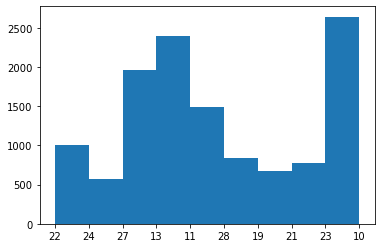

In [348]:

import numpy as np

def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])
    
import matplotlib.pyplot as plt
bins = range(10)
plt.hist(df_final_new_plt['Label'], bins=bins)
#bins_labels(bins, fontsize=20)
plt.show()

### Deskriptivna analiza

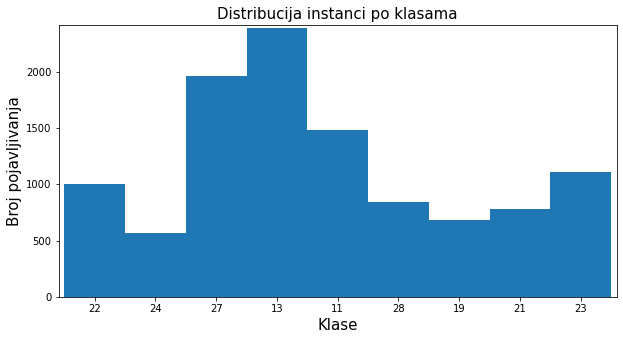

In [357]:
plt.figure(figsize=(10,5))
plt.margins(0.01)
plt.xlabel('Klase', fontsize=15)
plt.xticks(fontsize=10)
plt.ylabel('Broj pojavljivanja', fontsize=15)
plt.yticks(fontsize=10)
plt.hist(df_final_new_plt['Label'], bins=np.arange(-0.5, 9))
plt.title('Distribucija instanci po klasama', fontsize=15)
plt.xticks(rotation = 0) 
plt.show()



In [855]:
df_full['Label'].value_counts()

1000    3841
1303    1951
1313     971
1110     957
1300     861
        ... 
2602       1
2902       1
3500       1
2611       1
3315       1
Name: Label, Length: 231, dtype: int64

In [298]:
df_final_new.head()

,Text,Label
0,Objective The overall research objective was t...,22
1,The objective of an accident-mapping algorithm...,22
2,The Driver Behavior Questionnaire (DBQ) is a s...,22
3,Operating a motor vehicle under the influence ...,22
4,Driver drowsiness has been implicated as a maj...,22


In [300]:
df_final_new['Label'].nunique() ## broj razlicitih klasa

10

In [302]:
df_final_new['Label'].value_counts() # broj instanci svake klase


13    2391
27    1964
10    1536
11    1484
23    1106
22     999
28     838
21     777
19     679
24     567
Name: Label, dtype: int64

In [304]:
len(df_final_new)

12341

In [359]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.reset_option('all')

In [177]:
#max min i prosecan broj recenica u tekstu
max_sentences = 0
min_sentences = 1000
sum_sentences = 0

for i in df_final_new['Text']:
    sentences = nltk.sent_tokenize(i)
    if len(sentences)>max_sentences:
        max_sentences=len(sentences)
    elif len(sentences)<min_sentences:
        min_sentences=len(sentences)
    sum_sentences=sum_sentences+len(sentences)
avg_sentences=sum_sentences/len(df_final_new)
    


In [178]:
print(max_sentences)
print(min_sentences)
print(round(avg_sentences,2))

35
1
9.04


In [179]:
#max min i prosecan broj reci u tekstu

max_words = 0
min_words = 1000
sum_words = 0

for i in df_final_new['Text']:
    words = nltk.word_tokenize(i)
    if len(words)>max_words:
        max_words=len(words)
    elif len(words)<min_words:
        min_words=len(words)
    sum_words=sum_words+len(words)
avg_words=sum_words/len(df_final_new)

In [180]:
print(max_words)
print(min_words)
print(round(avg_words,2))
print(sum_words)

1210
20
245.47
3029387


In [182]:
#max min i prosecan broj razlicitih karaktera u tekstu
max_chars = 0
min_chars = 1000
sum_chars = 0

for i in df_final_new['Text']:
    chars = set(i)
    if len(chars)>max_chars:
        max_chars=len(chars)
    elif len(chars)<min_chars:
        min_chars=len(chars)
    sum_chars=sum_chars+len(chars)
avg_chars=sum_chars/len(df_final_new)

In [183]:
print(max_chars)
print(min_chars)
print(round(avg_chars,2))

81
26
49.04


In [309]:
df_final_new = pd.read_csv(r'C:\Users\Lenovo T450\df_final_new.csv')
df_final_new


,Text,Label
0,Objective The overall research objective was t...,22
1,The objective of an accident-mapping algorithm...,22
2,The Driver Behavior Questionnaire (DBQ) is a s...,22
3,Operating a motor vehicle under the influence ...,22
4,Driver drowsiness has been implicated as a maj...,22
...,...,...
12336,"Todays, Climate change can be effect on the in...",10
12337,The article presents the data on the explorato...,10
12338,The data presented in this article are related...,10
12339,The aim of the study is determining bone miner...,10


In [310]:
df_final_new['Text'][1234]

'Ex vivo ocular perfused models have been described in the past and were applied in different mammalian species as platforms to test drug delivery systems and surgical techniques. However, reproduction of those methods is challenging because extensive and precise description of the protocols used is lacking. In this technical paper we provide a detailed description of all the steps to be followed from the enucleation of porcine eyes to cannulation of the ophthalmic artery and perfusion. This model can contribute to the reduction of use of living animals in ophthalmology research, whereas as opposed to in vitro models, it preserves tissue complexity and integrity.'

### Obrada teksta

In [358]:
text=df_final_new['Text']

In [360]:
df_final_new['Label'].value_counts().index

Int64Index([13, 27, 10, 11, 23, 22, 28, 21, 19, 24], dtype='int64')

In [361]:
my_tags = []

for i in df_final_new['Label'].value_counts().index:
    my_tags.append(str(i))

my_tags



['13', '27', '10', '11', '23', '22', '28', '21', '19', '24']

In [362]:
## pravljenje rečnika kodnih labela i pravih imena klasa
my_tag_names= ['Biochemistry, Genetics and Molecular Biology','Medicine','General',
               'Agricultural and Biological Sciences','Environmental Science','Engineering'
              ,'Neuroscience','Energy','Earth and Planetary Sciences','Immunology and Microbiology']

my_tag_names[1]
my_tags_dict={}

for i in range(len(my_tag_names)):
    my_tags_dict[my_tags[i]]=(my_tag_names[i])

In [363]:
#pravimo recnik koda i naziva kategorije
my_tags_dict

{'13': 'Biochemistry, Genetics and Molecular Biology',
 '27': 'Medicine',
 '10': 'General',
 '11': 'Agricultural and Biological Sciences',
 '23': 'Environmental Science',
 '22': 'Engineering',
 '28': 'Neuroscience',
 '21': 'Energy',
 '19': 'Earth and Planetary Sciences',
 '24': 'Immunology and Microbiology'}

In [364]:
#standardno sredjivanje teksta

# izbacivanje znakova interpunkcije
text = text.str.replace(r'[^\w\d\s]', ' ')

# menjanje vise razmaka jednim razmakom
text = text.str.replace(r'\s+', ' ')

# izbacivanje spejsova s pocetka i kraja
text = text.str.replace(r'^\s+|\s+?$', '')

#prebacivanje svih slova u mala

text = text.str.lower()

#prebacivanje brojeva u konstantu number
text = text.str.replace(r'\d+(\.\d+)?', 'number')

# zamena URLa sa 'webaddress'
text = text.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')


In [11]:
text[1234]

'ex vivo ocular perfused models have been described in the past and were applied in different mammalian species as platforms to test drug delivery systems and surgical techniques however reproduction of those methods is challenging because extensive and precise description of the protocols used is lacking in this technical paper we provide a detailed description of all the steps to be followed from the enucleation of porcine eyes to cannulation of the ophthalmic artery and perfusion this model can contribute to the reduction of use of living animals in ophthalmology research whereas as opposed to in vitro models it preserves tissue complexity and integrity'

In [190]:
## broj karaktera po instanci nakon obrade teksta regularnim izrazima

#maksimalni broj razlicitih karaktera u tekstu
max_chars = 0
min_chars = 1000
sum_chars = 0

for i in text:
    chars = set(i)
    if len(chars)>max_chars:
        max_chars=len(chars)
    elif len(chars)<min_chars:
        min_chars=len(chars)
    sum_chars=sum_chars+len(chars)
avg_chars=sum_chars/len(df_final_new)

In [191]:
print(max_chars)
print(min_chars)
print(round(avg_chars,2))

32
21
25.65


In [322]:
#prebrojavamo i sortiramo stopwords koje se pojavljuju u tekstu
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

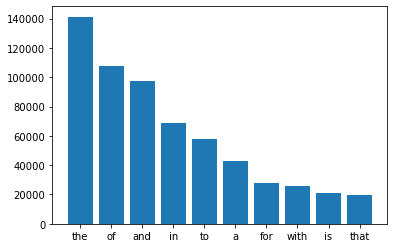

In [323]:
plot_top_stopwords_barchart(text)

In [468]:
#pronalazak top non stopwords
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

In [470]:
#pronalazak top non stopwords koji nisu number
def plot_top_non_stopwords_non_number_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if word!='number':
            if (word not in stop):
                x.append(word)
                y.append(count)
            
    sns.barplot(x=y,y=x)

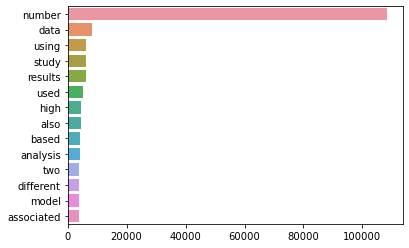

In [472]:
plot_top_non_stopwords_barchart(text)

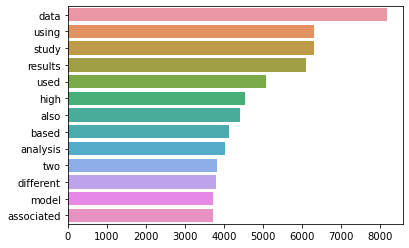

In [471]:
plot_top_non_stopwords_non_number_barchart(text)

In [365]:
#stemizacija teksta
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()

stemmed_text =  pd.DataFrame()

stemmed_text = pd.DataFrame({
                   'words': pd.Series(dtype='str')})

for i in text:
    tokens = word_tokenize(i)
    stemmed = []
    for token in tokens:
        stemmed_word = ps.stem(token)
        stemmed.append(stemmed_word)
    stemmed_text=stemmed_text.append({ 'words': stemmed}, ignore_index=True)






In [464]:
stemmed_tmp['words'][1234] #radi prikaza u tekstualnom delu rada

['ex',
 'vivo',
 'ocular',
 'perfus',
 'model',
 'have',
 'been',
 'describ',
 'in',
 'the',
 'past',
 'and',
 'were',
 'appli',
 'in',
 'differ',
 'mammalian',
 'speci',
 'as',
 'platform',
 'to',
 'test',
 'drug',
 'deliveri',
 'system',
 'and',
 'surgic',
 'techniqu',
 'howev',
 'reproduct',
 'of',
 'those',
 'method',
 'is',
 'challeng',
 'becaus',
 'extens',
 'and',
 'precis',
 'descript',
 'of',
 'the',
 'protocol',
 'use',
 'is',
 'lack',
 'in',
 'thi',
 'technic',
 'paper',
 'we',
 'provid',
 'a',
 'detail',
 'descript',
 'of',
 'all',
 'the',
 'step',
 'to',
 'be',
 'follow',
 'from',
 'the',
 'enucl',
 'of',
 'porcin',
 'eye',
 'to',
 'cannul',
 'of',
 'the',
 'ophthalm',
 'arteri',
 'and',
 'perfus',
 'thi',
 'model',
 'can',
 'contribut',
 'to',
 'the',
 'reduct',
 'of',
 'use',
 'of',
 'live',
 'anim',
 'in',
 'ophthalmolog',
 'research',
 'wherea',
 'as',
 'oppos',
 'to',
 'in',
 'vitro',
 'model',
 'it',
 'preserv',
 'tissu',
 'complex',
 'and',
 'integr']

In [366]:
#izbacivanje STOPWORDS na engleskom jeziku

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stops = []
filtered_words = []
cnt = 0
words = stemmed_text['words']

for i in stemmed_text['words']:
    for word in i:
        if word not in stop_words:
            filtered_words.append(word)
        else:
            stops.append(word)
         
    words[cnt]=filtered_words
    cnt=cnt+1
    filtered_words=[]
            
    
            
            

    

In [474]:
words[1234]  #radi prikaza u tekstualnom delu rada

['ex',
 'vivo',
 'ocular',
 'perfus',
 'model',
 'describ',
 'past',
 'appli',
 'differ',
 'mammalian',
 'speci',
 'platform',
 'test',
 'drug',
 'deliveri',
 'system',
 'surgic',
 'techniqu',
 'howev',
 'reproduct',
 'method',
 'challeng',
 'becaus',
 'extens',
 'precis',
 'descript',
 'protocol',
 'use',
 'lack',
 'thi',
 'technic',
 'paper',
 'provid',
 'detail',
 'descript',
 'step',
 'follow',
 'enucl',
 'porcin',
 'eye',
 'cannul',
 'ophthalm',
 'arteri',
 'perfus',
 'thi',
 'model',
 'contribut',
 'reduct',
 'use',
 'live',
 'anim',
 'ophthalmolog',
 'research',
 'wherea',
 'oppos',
 'vitro',
 'model',
 'preserv',
 'tissu',
 'complex',
 'integr']

In [311]:
#broj reci nakon stemizacije i izbacivanja stopwords
#av je ukupan broj reci a allword ukupan broj razlicitih reci
words = stemmed_text['words']
allwords = []
for wordlist in words:
    
    allwords += wordlist
av=allwords
allwords=set(allwords)
print(len(av))
print(len(allwords))

1871299
46451


In [313]:
#pokusaj da se izbace reci koje sadrze number i reci do 2 slova, nije doprineo poboljasnju klasifikacije
#radjeno i na ukupnom broju svih reci a i na broju razlicitih reci
finalwords = []
for word in allwords:
    if 'number' not in word and len(word)>2:
        finalwords.append(word)
print(len(finalwords))    

finalwords_nu = []
for word in av:
    if 'number' not in word and len(word)>2:
        finalwords_nu.append(word)
print(len(finalwords_nu)) 

43383
1656061


In [314]:
#provera koliko se svaka rec pojavljuje ukupno u tekstovima, može koristiti pri odabiru vocab_size u lstm i cnn
from collections import defaultdict

temp = defaultdict(int)
 
# memoizing count
for sub in finalwords_nu:
    for wrd in sub.split():
        temp[wrd] += 1

In [315]:
temp

defaultdict(int,
            {'object': 1176,
             'overal': 1002,
             'research': 2430,
             'theoret': 246,
             'empir': 208,
             'develop': 4979,
             'idea': 68,
             'around': 533,
             'system': 4675,
             'safeti': 710,
             'manag': 1339,
             'practic': 794,
             'ten': 234,
             'elabor': 44,
             'test': 3428,
             'relationship': 1140,
             'statist': 773,
             'accid': 139,
             'rate': 2749,
             'explor': 896,
             'work': 1567,
             'achiev': 979,
             'posit': 1662,
             'result': 8077,
             'prevent': 947,
             'worker': 175,
             'engag': 230,
             'method': 4895,
             'data': 8156,
             'collect': 1465,
             'use': 15275,
             'supervisor': 4,
             'employe': 57,
             'survey': 716,
             'design'

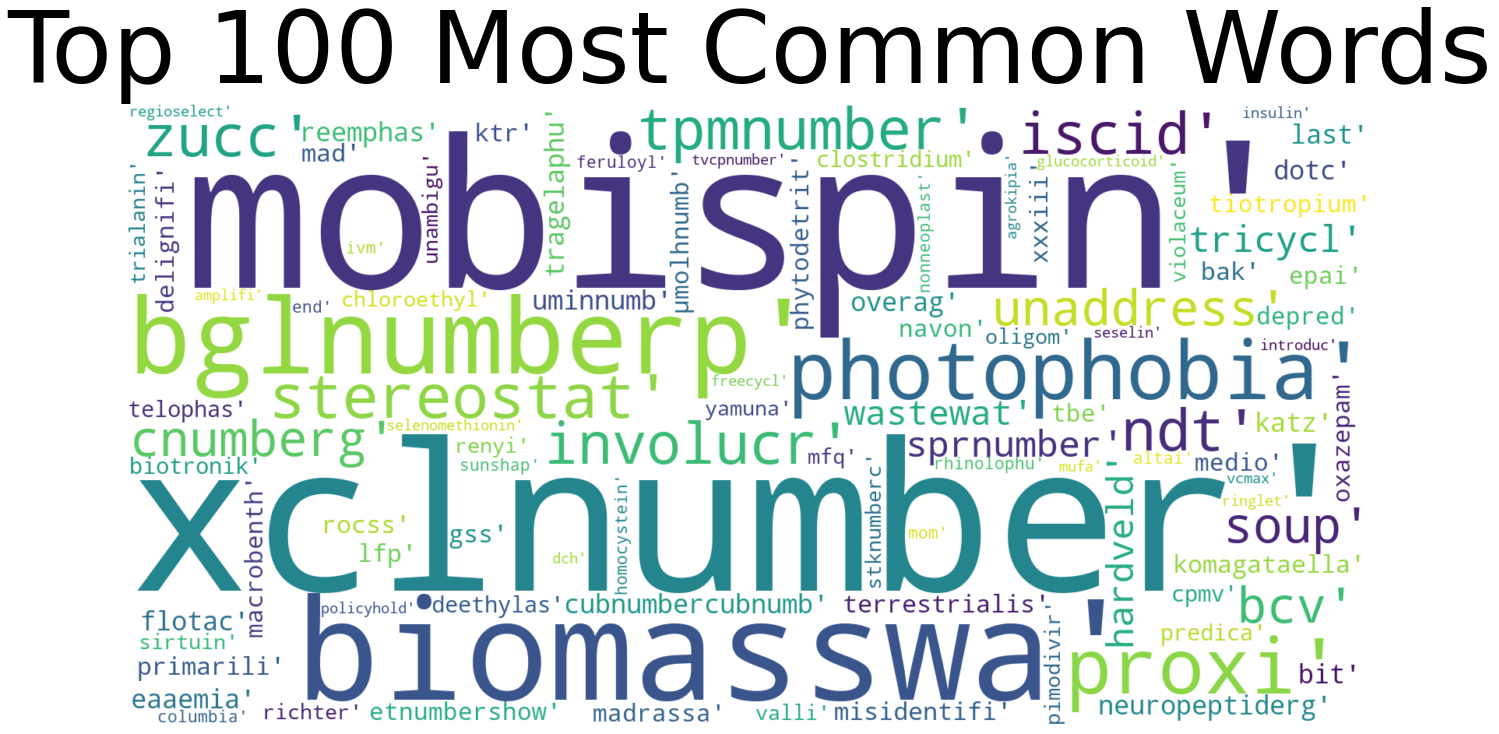

In [316]:
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator

mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

In [367]:
df_stemmed = pd.DataFrame({"Text":words, "Label":df_final_new["Label"]})


In [368]:
df_stemmed.to_csv('df_stemmed.csv',index=False)

In [369]:
#labele za predvidjanje
classes = df_stemmed["Label"]
classes

0        22
1        22
2        22
3        22
4        22
         ..
12336    10
12337    10
12338    10
12339    10
12340    10
Name: Label, Length: 12341, dtype: int64

In [370]:
#namestamo pogodan format teksta, da budu reci razdvojene razmacima
rows = []
for i in df_stemmed["Text"]:
    rows.append(' '.join(i))


    

In [23]:
rows[1234]

'ex vivo ocular perfus model describ past appli differ mammalian speci platform test drug deliveri system surgic techniqu howev reproduct method challeng becaus extens precis descript protocol use lack thi technic paper provid detail descript step follow enucl porcin eye cannul ophthalm arteri perfus thi model contribut reduct use live anim ophthalmolog research wherea oppos vitro model preserv tissu complex integr'

In [371]:
df_rows = pd.DataFrame({"Text":rows})
s_rows = pd.Series(rows)
s_rows

0        object overal research object wa theoret empir...
1        object accid map algorithm snap traffic accid ...
2        driver behavior questionnair dbq self report m...
3        oper motor vehicl influenc alcohol oui intern ...
4        driver drowsi ha implic major causal factor ro...
                               ...                        
12336    today climat chang effect intens ultraviolet u...
12337    articl present data exploratori analysi factor...
12338    data present thi articl relat research articl ...
12339    aim studi determin bone miner densiti bmd pati...
12340    dataset contain thi articl outcom durabl prope...
Length: 12341, dtype: object

In [372]:
#encodujemo labele za pojedine algoritme
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

encoder = LabelEncoder()
codes = encoder.fit_transform(classes)
print(codes)

[5 5 5 ... 0 0 0]


### Predikcija kategorija

In [373]:
from sklearn.model_selection import train_test_split
X=s_rows
y=classes #codes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 42,stratify=y)

In [374]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from statistics import mean,stdev
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

In [474]:
### XGB Klasifikator testiranje na test skupu, ispod je kros validacija

In [28]:
from xgboost import XGBClassifier

#celija ispod je kros validacija, ovde se testira na test skupu

xgb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', XGBClassifier(max_depth=15,
                        subsample=1,
                        objective='reg:logistic',
                        n_estimators=300,
                        learning_rate = 0.3)),
              ])
xgb.fit(X_train, y_train)


y_pred = xgb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags,digits=4))

accuracy 0.7510799136069114
              precision    recall  f1-score   support

          13     0.8547    0.8696    0.8621       230
          27     0.7342    0.7309    0.7326       223
          10     0.7161    0.7660    0.7402       359
          11     0.8085    0.7451    0.7755       102
          23     0.7193    0.7069    0.7130       116
          22     0.6867    0.6867    0.6867       150
          28     0.6818    0.7229    0.7018       166
          21     0.6897    0.4706    0.5594        85
          19     0.8000    0.8271    0.8133       295
          24     0.7652    0.6984    0.7303       126

    accuracy                         0.7511      1852
   macro avg     0.7456    0.7224    0.7315      1852
weighted avg     0.7508    0.7511    0.7496      1852



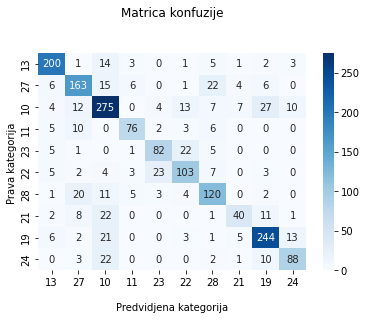

In [407]:


cf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

ax.set_title('Matrica konfuzije\n\n');
ax.set_xlabel('\nPredvidjena kategorija')
ax.set_ylabel('Prava kategorija ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(my_tags)
ax.yaxis.set_ticklabels(my_tags)

## Display the visualization of the Confusion Matrix.
plt.show()

In [220]:

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
i=0
for md in [12,15]:
    for sb in [0.5, 1]:
        for obj in ['reg:logistic', 'binary:logistic']:
            for lr in [0.1,0.3,0.4]:
                xgb = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', XGBClassifier(max_depth=md, subsample=sb,objective=obj, learning_rate=lr, n_estimators=100)),
               ])
                xgb_accu_stratified = []
                print('iteracija ',i,'za parametre max_depth=', md, ', subsample=', sb, ' objective ', obj, 'learning_rate ',lr)

                for train_index, test_index in skf.split(X_train, y_train):
                    x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
                    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
                    xgb.fit(x_train_fold, y_train_fold)
                    xgb_accu_stratified.append(xgb.score(x_test_fold, y_test_fold))
  
                # Print the output.
                print('List of possible accuraies:', xgb_accu_stratified)
                print('\nMaximum Accuracy That can be obtained from this model is:',
                      max(xgb_accu_stratified)*100, '%')
                print('\nMinimum Accuracy:',
                      min(xgb_accu_stratified)*100, '%')
                print('\nOverall Accuracy:',
                      mean(xgb_accu_stratified)*100, '%')
                print('\nStandard Deviation is:', stdev(xgb_accu_stratified))
                    
               # fin_conf_mat = np.zeros((len(np.unique(y)),len(np.unique(y))))

iteracija  0 za parametre max_depth= 12 , subsample= 0.5  objective  reg:logistic learning_rate  0.1
List of possible accuraies: [0.7259294566253575, 0.7321258341277407, 0.7202097235462345, 0.726882745471878, 0.7467811158798283]

Maximum Accuracy That can be obtained from this model is: 74.67811158798283 %

Minimum Accuracy: 72.02097235462345 %

Overall Accuracy: 73.03857751302077 %

Standard Deviation is: 0.010093525410560944
iteracija  0 za parametre max_depth= 12 , subsample= 0.5  objective  reg:logistic learning_rate  0.3
List of possible accuraies: [0.7178265014299333, 0.724976167778837, 0.724976167778837, 0.719256434699714, 0.7424892703862661]

Maximum Accuracy That can be obtained from this model is: 74.2489270386266 %

Minimum Accuracy: 71.78265014299333 %

Overall Accuracy: 72.59049084147175 %

Standard Deviation is: 0.009826355408946408
iteracija  0 za parametre max_depth= 12 , subsample= 0.5  objective  reg:logistic learning_rate  0.4
List of possible accuraies: [0.700667302

List of possible accuraies: [0.7383222116301239, 0.734509056244042, 0.7330791229742613, 0.7454718779790277, 0.7443967572722937]

Maximum Accuracy That can be obtained from this model is: 74.54718779790277 %

Minimum Accuracy: 73.30791229742613 %

Overall Accuracy: 73.91558052199497 %

Standard Deviation is: 0.005625246104529552
iteracija  0 za parametre max_depth= 15 , subsample= 1  objective  reg:logistic learning_rate  0.4
List of possible accuraies: [0.7311725452812202, 0.7254528122020972, 0.7273593898951383, 0.7264061010486177, 0.7391511683357177]

Maximum Accuracy That can be obtained from this model is: 73.91511683357177 %

Minimum Accuracy: 72.54528122020972 %

Overall Accuracy: 72.99084033525583 %

Standard Deviation is: 0.005604521453346437
iteracija  0 za parametre max_depth= 15 , subsample= 1  objective  binary:logistic learning_rate  0.1
List of possible accuraies: [0.7240228789323165, 0.7316491897044805, 0.7159199237368923, 0.724976167778837, 0.7362899380066762]

Maximum A

### MLP CLassifier

In [30]:
#celija ispod je kros validacija, ovde se testira na test skupu
from sklearn.neural_network import MLPClassifier,MLPRegressor

mlp = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MLPClassifier(solver='adam',activation='logistic',learning_rate='adaptive',
                                     hidden_layer_sizes=(100,),learning_rate_init=0.001,
                                     shuffle=True,early_stopping=True,validation_fraction=0.1,max_iter=1000))
              ])
mlp.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = mlp.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags,digits=4))

accuracy 0.785097192224622
              precision    recall  f1-score   support

          13     0.8960    0.7870    0.8380       230
          27     0.8047    0.7758    0.7900       223
          10     0.7310    0.8022    0.7649       359
          11     0.8617    0.7941    0.8265       102
          23     0.8125    0.7845    0.7982       116
          22     0.7436    0.7733    0.7582       150
          28     0.7273    0.8193    0.7705       166
          21     0.7246    0.5882    0.6494        85
          19     0.8203    0.8203    0.8203       295
          24     0.7500    0.7619    0.7559       126

    accuracy                         0.7851      1852
   macro avg     0.7872    0.7707    0.7772      1852
weighted avg     0.7886    0.7851    0.7854      1852



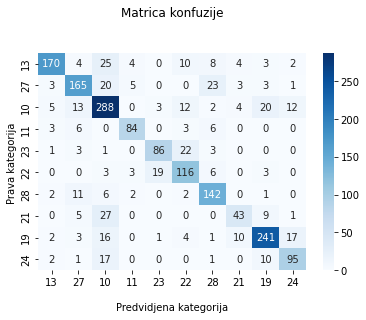

In [403]:

cf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

ax.set_title('Matrica konfuzije\n\n');
ax.set_xlabel('\nPredvidjena kategorija')
ax.set_ylabel('Prava kategorija ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(my_tags)
ax.yaxis.set_ticklabels(my_tags)

## Display the visualization of the Confusion Matrix.
plt.show()

In [227]:



skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

acc = []
i=0
for hl in [(100,),(128,128,128)]:
    for slv in ['lbfgs', 'adam']:
        for act in ['relu', 'logistic','tanh']:
            for lr in ['adaptive','constant']:
           # fin_conf_mat = np.zeros((len(np.unique(y)),len(np.unique(y))))
                sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', MLPClassifier(solver=slv, hidden_layer_sizes=hl, activation=act, learning_rate=lr,
                                     learning_rate_init=0.001,shuffle=True,early_stopping=True,validation_fraction=0.1,max_iter=1000)),
               ])
                sgd_accu_stratified = []

                print('iteracija ',i,'za parametre solver=', slv, ', activation=', act, ' learning rate ', lr, 'hidden layers ',hl)
                for train_index, test_index in skf.split(X_train, y_train):
                    x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
                    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
                    sgd.fit(x_train_fold, y_train_fold)
                    sgd_accu_stratified.append(sgd.score(x_test_fold, y_test_fold))
  
                # Print the output.
                print('List of possible accuraies:', sgd_accu_stratified)
                print('\nMaximum Accuracy That can be obtained from this model is:',
                      max(sgd_accu_stratified)*100, '%')
                print('\nMinimum Accuracy:',
                      min(sgd_accu_stratified)*100, '%')
                print('\nOverall Accuracy:',
                      mean(sgd_accu_stratified)*100, '%')
                print('\nStandard Deviation is:', stdev(sgd_accu_stratified))

                i=i+1

iteracija  0 za parametre solver= lbfgs , activation= relu  learning rate  adaptive hidden layers  (100,)
List of possible accuraies: [0.7497616777883699, 0.7330791229742613, 0.7297426120114394, 0.7321258341277407, 0.7587029089175011]

Maximum Accuracy That can be obtained from this model is: 75.87029089175012 %

Minimum Accuracy: 72.97426120114395 %

Overall Accuracy: 74.06824311638624 %

Standard Deviation is: 0.012824543160385508
iteracija  1 za parametre solver= lbfgs , activation= relu  learning rate  constant hidden layers  (100,)
List of possible accuraies: [0.7516682554814109, 0.7426120114394662, 0.7454718779790277, 0.7497616777883699, 0.7515498330948974]

Maximum Accuracy That can be obtained from this model is: 75.16682554814109 %

Minimum Accuracy: 74.26120114394662 %

Overall Accuracy: 74.82127311566344 %

Standard Deviation is: 0.004011124245922803
iteracija  2 za parametre solver= lbfgs , activation= logistic  learning rate  adaptive hidden layers  (100,)
List of possible

List of possible accuraies: [0.7368922783603432, 0.7445185891325071, 0.7449952335557674, 0.7483317445185891, 0.7434430138292799]

Maximum Accuracy That can be obtained from this model is: 74.83317445185891 %

Minimum Accuracy: 73.68922783603432 %

Overall Accuracy: 74.36361718792973 %

Standard Deviation is: 0.004189019010680037
iteracija  20 za parametre solver= adam , activation= logistic  learning rate  adaptive hidden layers  (128, 128, 128)
List of possible accuraies: [0.6048617731172545, 0.6248808388941849, 0.59628217349857, 0.6439466158245949, 0.6866952789699571]

Maximum Accuracy That can be obtained from this model is: 68.6695278969957 %

Minimum Accuracy: 59.628217349857 %

Overall Accuracy: 63.13333360609123 %

Standard Deviation is: 0.03603818083088983
iteracija  21 za parametre solver= adam , activation= logistic  learning rate  constant hidden layers  (128, 128, 128)
List of possible accuraies: [0.6139180171591992, 0.6510962821734986, 0.6382268827454719, 0.663489037178265

### SVM

In [214]:

from sklearn.linear_model import SGDClassifier
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

for a in [0.00001, 0.0001,0.001]:
    for pen in ['l1', 'l2']:
        for max_it in [5, 10,50]:
            for t in [None,1e-3]:
                sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty=pen,alpha=a, random_state=42, max_iter=max_it, tol=t)),
               ])
                sgd_accu_stratified = []
                print('za parametre a=', a, ', penalty=', pen, ' max iteracija ', max_it, 'tol= ',t)

                for train_index, test_index in skf.split(X_train, y_train):
                    x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
                    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
                    sgd.fit(x_train_fold, y_train_fold)
                    sgd_accu_stratified.append(sgd.score(x_test_fold, y_test_fold))
  
                # Print the output.
                print('List of possible accuraies:', sgd_accu_stratified)
                print('\nMaximum Accuracy That can be obtained from this model is:',
                      max(sgd_accu_stratified)*100, '%')
                print('\nMinimum Accuracy:',
                      min(sgd_accu_stratified)*100, '%')
                print('\nOverall Accuracy:',
                      mean(sgd_accu_stratified)*100, '%')
                print('\nStandard Deviation is:', stdev(sgd_accu_stratified))
                    
               # fin_conf_mat = np.zeros((len(np.unique(y)),len(np.unique(y))))





za parametre a= 1e-05 , penalty= l1  max iteracija  5 tol=  None
List of possible accuraies: [0.736415633937083, 0.7264061010486177, 0.7378455672068637, 0.7244995233555768, 0.7286599904625656]

Maximum Accuracy That can be obtained from this model is: 73.78455672068637 %

Minimum Accuracy: 72.44995233555768 %

Overall Accuracy: 73.07653632021413 %

Standard Deviation is: 0.006015632926075045
za parametre a= 1e-05 , penalty= l1  max iteracija  5 tol=  0.001


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mo

List of possible accuraies: [0.736415633937083, 0.7264061010486177, 0.7378455672068637, 0.7244995233555768, 0.7286599904625656]

Maximum Accuracy That can be obtained from this model is: 73.78455672068637 %

Minimum Accuracy: 72.44995233555768 %

Overall Accuracy: 73.07653632021413 %

Standard Deviation is: 0.006015632926075045
za parametre a= 1e-05 , penalty= l1  max iteracija  10 tol=  None
List of possible accuraies: [0.7330791229742613, 0.7216396568160153, 0.7349857006673022, 0.7240228789323165, 0.7310443490701002]

Maximum Accuracy That can be obtained from this model is: 73.49857006673022 %

Minimum Accuracy: 72.16396568160152 %

Overall Accuracy: 72.89543416919992 %

Standard Deviation is: 0.005822009583062121
za parametre a= 1e-05 , penalty= l1  max iteracija  10 tol=  0.001


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mo

List of possible accuraies: [0.7316491897044805, 0.7216396568160153, 0.7340324118207817, 0.7235462345090562, 0.7310443490701002]

Maximum Accuracy That can be obtained from this model is: 73.40324118207818 %

Minimum Accuracy: 72.16396568160152 %

Overall Accuracy: 72.83823683840868 %

Standard Deviation is: 0.00544365694400488
za parametre a= 1e-05 , penalty= l1  max iteracija  50 tol=  None
List of possible accuraies: [0.7254528122020972, 0.7206863679694948, 0.7311725452812202, 0.7235462345090562, 0.7381974248927039]

Maximum Accuracy That can be obtained from this model is: 73.8197424892704 %

Minimum Accuracy: 72.06863679694948 %

Overall Accuracy: 72.78110769709146 %

Standard Deviation is: 0.006958582194902811
za parametre a= 1e-05 , penalty= l1  max iteracija  50 tol=  0.001
List of possible accuraies: [0.7321258341277407, 0.7202097235462345, 0.7359389895138226, 0.7235462345090562, 0.7358130662851693]

Maximum Accuracy That can be obtained from this model is: 73.59389895138226 %

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mo

List of possible accuraies: [0.7335557673975215, 0.7392755004766445, 0.7373689227836034, 0.7383222116301239, 0.7443967572722937]

Maximum Accuracy That can be obtained from this model is: 74.43967572722937 %

Minimum Accuracy: 73.35557673975215 %

Overall Accuracy: 73.85838319120374 %

Standard Deviation is: 0.003908144981048277
za parametre a= 1e-05 , penalty= l2  max iteracija  10 tol=  None
List of possible accuraies: [0.7368922783603432, 0.7387988560533841, 0.7492850333651097, 0.7469018112488084, 0.7420123986647592]

Maximum Accuracy That can be obtained from this model is: 74.92850333651097 %

Minimum Accuracy: 73.68922783603432 %

Overall Accuracy: 74.27780755384809 %

Standard Deviation is: 0.0052537784872854825
za parametre a= 1e-05 , penalty= l2  max iteracija  10 tol=  0.001


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mo

List of possible accuraies: [0.7359389895138226, 0.7392755004766445, 0.7492850333651097, 0.7469018112488084, 0.7420123986647592]

Maximum Accuracy That can be obtained from this model is: 74.92850333651097 %

Minimum Accuracy: 73.59389895138226 %

Overall Accuracy: 74.26827466538288 %

Standard Deviation is: 0.005452697707931757
za parametre a= 1e-05 , penalty= l2  max iteracija  50 tol=  None
List of possible accuraies: [0.7435653002859867, 0.7407054337464252, 0.7464251668255482, 0.7426120114394662, 0.7448736289938007]

Maximum Accuracy That can be obtained from this model is: 74.64251668255481 %

Minimum Accuracy: 74.07054337464251 %

Overall Accuracy: 74.36363082582453 %

Standard Deviation is: 0.0021767490794862023
za parametre a= 1e-05 , penalty= l2  max iteracija  50 tol=  0.001
List of possible accuraies: [0.7464251668255482, 0.7383222116301239, 0.7459485224022879, 0.7440419447092469, 0.7467811158798283]

Maximum Accuracy That can be obtained from this model is: 74.6781115879828

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mo

List of possible accuraies: [0.7445185891325071, 0.7354623450905624, 0.7407054337464252, 0.7321258341277407, 0.748688602765856]

Maximum Accuracy That can be obtained from this model is: 74.86886027658561 %

Minimum Accuracy: 73.21258341277407 %

Overall Accuracy: 74.03001609726184 %

Standard Deviation is: 0.006681119287878129
za parametre a= 0.0001 , penalty= l1  max iteracija  10 tol=  None
List of possible accuraies: [0.7430886558627264, 0.7373689227836034, 0.7440419447092469, 0.7340324118207817, 0.748688602765856]

Maximum Accuracy That can be obtained from this model is: 74.86886027658561 %

Minimum Accuracy: 73.40324118207818 %

Overall Accuracy: 74.14441075884429 %

Standard Deviation is: 0.005776598749571396
za parametre a= 0.0001 , penalty= l1  max iteracija  10 tol=  0.001


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mo

List of possible accuraies: [0.7407054337464252, 0.736415633937083, 0.7449952335557674, 0.7316491897044805, 0.748688602765856]

Maximum Accuracy That can be obtained from this model is: 74.86886027658561 %

Minimum Accuracy: 73.16491897044804 %

Overall Accuracy: 74.04908187419224 %

Standard Deviation is: 0.006751314882075486
za parametre a= 0.0001 , penalty= l1  max iteracija  50 tol=  None
List of possible accuraies: [0.7464251668255482, 0.7440419447092469, 0.7445185891325071, 0.734509056244042, 0.7472579876013352]

Maximum Accuracy That can be obtained from this model is: 74.72579876013353 %

Minimum Accuracy: 73.4509056244042 %

Overall Accuracy: 74.33505489025359 %

Standard Deviation is: 0.005117022843606279
za parametre a= 0.0001 , penalty= l1  max iteracija  50 tol=  0.001
List of possible accuraies: [0.7435653002859867, 0.734509056244042, 0.7449952335557674, 0.7311725452812202, 0.748688602765856]

Maximum Accuracy That can be obtained from this model is: 74.86886027658561 %



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mo

List of possible accuraies: [0.765490943755958, 0.7559580552907531, 0.76930409914204, 0.7612011439466159, 0.771101573676681]

Maximum Accuracy That can be obtained from this model is: 77.1101573676681 %

Minimum Accuracy: 75.5958055290753 %

Overall Accuracy: 76.46111631624096 %

Standard Deviation is: 0.00615279606228064
za parametre a= 0.0001 , penalty= l2  max iteracija  10 tol=  None
List of possible accuraies: [0.7669208770257387, 0.7530981887511916, 0.7702573879885606, 0.7659675881792183, 0.7725321888412017]

Maximum Accuracy That can be obtained from this model is: 77.25321888412017 %

Minimum Accuracy: 75.30981887511916 %

Overall Accuracy: 76.57552461571822 %

Standard Deviation is: 0.007546540926923534
za parametre a= 0.0001 , penalty= l2  max iteracija  10 tol=  0.001


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mo

List of possible accuraies: [0.7669208770257387, 0.7530981887511916, 0.7702573879885606, 0.7659675881792183, 0.7725321888412017]

Maximum Accuracy That can be obtained from this model is: 77.25321888412017 %

Minimum Accuracy: 75.30981887511916 %

Overall Accuracy: 76.57552461571822 %

Standard Deviation is: 0.007546540926923534
za parametre a= 0.0001 , penalty= l2  max iteracija  50 tol=  None
List of possible accuraies: [0.7688274547187798, 0.7478551000953289, 0.7683508102955195, 0.7640610104861774, 0.7696709585121603]

Maximum Accuracy That can be obtained from this model is: 76.96709585121603 %

Minimum Accuracy: 74.78551000953289 %

Overall Accuracy: 76.37530668215932 %

Standard Deviation is: 0.009148090989031464
za parametre a= 0.0001 , penalty= l2  max iteracija  50 tol=  0.001
List of possible accuraies: [0.765490943755958, 0.7516682554814109, 0.7664442326024785, 0.7645376549094376, 0.7696709585121603]

Maximum Accuracy That can be obtained from this model is: 76.9670958512160

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mo

List of possible accuraies: [0.48665395614871304, 0.4714013346043851, 0.4680648236415634, 0.4804575786463298, 0.48116356700047686]

Maximum Accuracy That can be obtained from this model is: 48.6653956148713 %

Minimum Accuracy: 46.80648236415634 %

Overall Accuracy: 47.754825200829366 %

Standard Deviation is: 0.0076185388859958
za parametre a= 0.001 , penalty= l1  max iteracija  10 tol=  None
List of possible accuraies: [0.47616777883698763, 0.4752144899904671, 0.47616777883698763, 0.4661582459485224, 0.45445875059608964]

Maximum Accuracy That can be obtained from this model is: 47.61677788369877 %

Minimum Accuracy: 45.445875059608966 %

Overall Accuracy: 46.963340884181086 %

Standard Deviation is: 0.009472215412258938
za parametre a= 0.001 , penalty= l1  max iteracija  10 tol=  0.001
List of possible accuraies: [0.4694947569113441, 0.5052430886558628, 0.47283126787416585, 0.47664442326024786, 0.48831664282308057]

Maximum Accuracy That can be obtained from this model is: 50.524308

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mo

List of possible accuraies: [0.7311725452812202, 0.734509056244042, 0.7421353670162059, 0.7397521448999047, 0.7491654744873629]

Maximum Accuracy That can be obtained from this model is: 74.9165474487363 %

Minimum Accuracy: 73.11725452812202 %

Overall Accuracy: 73.93469175857471 %

Standard Deviation is: 0.006974399328386893
za parametre a= 0.001 , penalty= l2  max iteracija  10 tol=  None
List of possible accuraies: [0.7297426120114394, 0.7316491897044805, 0.7440419447092469, 0.7378455672068637, 0.748688602765856]

Maximum Accuracy That can be obtained from this model is: 74.86886027658561 %

Minimum Accuracy: 72.97426120114395 %

Overall Accuracy: 73.83935832795773 %

Standard Deviation is: 0.008039245662015578
za parametre a= 0.001 , penalty= l2  max iteracija  10 tol=  0.001


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mo

List of possible accuraies: [0.7311725452812202, 0.7311725452812202, 0.7430886558627264, 0.7378455672068637, 0.7472579876013352]

Maximum Accuracy That can be obtained from this model is: 74.72579876013353 %

Minimum Accuracy: 73.11725452812202 %

Overall Accuracy: 73.81074602466732 %

Standard Deviation is: 0.007155402500108464
za parametre a= 0.001 , penalty= l2  max iteracija  50 tol=  None
List of possible accuraies: [0.7302192564346998, 0.73069590085796, 0.7402287893231649, 0.7392755004766445, 0.748211731044349]

Maximum Accuracy That can be obtained from this model is: 74.8211731044349 %

Minimum Accuracy: 73.02192564346997 %

Overall Accuracy: 73.77262356273636 %

Standard Deviation is: 0.007489808980911688
za parametre a= 0.001 , penalty= l2  max iteracija  50 tol=  0.001
List of possible accuraies: [0.7311725452812202, 0.7311725452812202, 0.7430886558627264, 0.7378455672068637, 0.7472579876013352]

Maximum Accuracy That can be obtained from this model is: 74.72579876013353 %



In [61]:
#SVM na test skupu testiran s najboljim parametrima


nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier(loss='hinge',alpha=0.0001, penalty='l2', random_state=42, max_iter=50, tol=0.001)),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags,digits=4))

accuracy 0.7926565874730022
              precision    recall  f1-score   support

          13     0.8952    0.8174    0.8545       230
          27     0.7883    0.7848    0.7865       223
          10     0.7534    0.7660    0.7597       359
          11     0.8788    0.8529    0.8657       102
          23     0.7760    0.8362    0.8050       116
          22     0.7597    0.7800    0.7697       150
          28     0.7600    0.8012    0.7801       166
          21     0.7231    0.5529    0.6267        85
          19     0.8170    0.8475    0.8319       295
          24     0.7557    0.7857    0.7704       126

    accuracy                         0.7927      1852
   macro avg     0.7907    0.7825    0.7850      1852
weighted avg     0.7935    0.7927    0.7921      1852



### Logisticka regresija

In [233]:
from sklearn.linear_model import LogisticRegression

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

for sol in ['lbfgs', 'newton-cg']:
    for pen in ['none', 'l2']:
        for max_it in [100,200]:
            for mc in ['multinomial','auto']:
                sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(solver=sol, penalty=pen, multi_class=mc, max_iter=max_it,random_state=42)),
               ])
                sgd_accu_stratified = []
                print('za parametre solver=', sol, ', penalty=', pen, ' max iteracija ', max_it, 'mc= ',mc)

                for train_index, test_index in skf.split(X_train, y_train):
                    x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
                    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
                    sgd.fit(x_train_fold, y_train_fold)
                    sgd_accu_stratified.append(sgd.score(x_test_fold, y_test_fold))
  
                # Print the output.
                print('List of possible accuraies:', sgd_accu_stratified)
                print('\nMaximum Accuracy That can be obtained from this model is:',
                      max(sgd_accu_stratified)*100, '%')
                print('\nMinimum Accuracy:',
                      min(sgd_accu_stratified)*100, '%')
                print('\nOverall Accuracy:',
                      mean(sgd_accu_stratified)*100, '%')
                print('\nStandard Deviation is:', stdev(sgd_accu_stratified))
                    
               # fin_conf_mat = np.zeros((len(np.unique(y)),len(np.unique(y))))





za parametre solver= lbfgs , penalty= none  max iteracija  100 mc=  multinomial
List of possible accuraies: [0.7449952335557674, 0.7478551000953289, 0.7507149666348903, 0.7488083889418494, 0.7591797806390082]

Maximum Accuracy That can be obtained from this model is: 75.91797806390082 %

Minimum Accuracy: 74.49952335557674 %

Overall Accuracy: 75.03106939733688 %

Standard Deviation is: 0.005370407708455636
za parametre solver= lbfgs , penalty= none  max iteracija  100 mc=  auto
List of possible accuraies: [0.7449952335557674, 0.7478551000953289, 0.7507149666348903, 0.7488083889418494, 0.7591797806390082]

Maximum Accuracy That can be obtained from this model is: 75.91797806390082 %

Minimum Accuracy: 74.49952335557674 %

Overall Accuracy: 75.03106939733688 %

Standard Deviation is: 0.005370407708455636
za parametre solver= lbfgs , penalty= none  max iteracija  200 mc=  multinomial
List of possible accuraies: [0.7449952335557674, 0.7478551000953289, 0.7507149666348903, 0.74880838894184

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

List of possible accuraies: [0.7378455672068637, 0.7349857006673022, 0.7449952335557674, 0.7407054337464252, 0.7558416785884597]

Maximum Accuracy That can be obtained from this model is: 75.58416785884597 %

Minimum Accuracy: 73.49857006673022 %

Overall Accuracy: 74.28747227529637 %

Standard Deviation is: 0.008137465813650536
za parametre solver= lbfgs , penalty= l2  max iteracija  100 mc=  auto


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

List of possible accuraies: [0.7378455672068637, 0.7349857006673022, 0.7449952335557674, 0.7407054337464252, 0.7558416785884597]

Maximum Accuracy That can be obtained from this model is: 75.58416785884597 %

Minimum Accuracy: 73.49857006673022 %

Overall Accuracy: 74.28747227529637 %

Standard Deviation is: 0.008137465813650536
za parametre solver= lbfgs , penalty= l2  max iteracija  200 mc=  multinomial
List of possible accuraies: [0.7378455672068637, 0.7349857006673022, 0.7449952335557674, 0.7407054337464252, 0.7558416785884597]

Maximum Accuracy That can be obtained from this model is: 75.58416785884597 %

Minimum Accuracy: 73.49857006673022 %

Overall Accuracy: 74.28747227529637 %

Standard Deviation is: 0.008137465813650536
za parametre solver= lbfgs , penalty= l2  max iteracija  200 mc=  auto
List of possible accuraies: [0.7378455672068637, 0.7349857006673022, 0.7449952335557674, 0.7407054337464252, 0.7558416785884597]

Maximum Accuracy That can be obtained from this model is: 7

In [62]:
#obuka za konf matricu na kros validaciji


lg = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression(solver='newton-cg', penalty='none', multi_class='multinomial', max_iter=200)),
              ])
lg.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = lg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags,digits=4))

accuracy 0.7732181425485961
              precision    recall  f1-score   support

          13     0.8981    0.8043    0.8486       230
          27     0.7919    0.7848    0.7883       223
          10     0.7292    0.7577    0.7432       359
          11     0.8977    0.7745    0.8316       102
          23     0.7458    0.7586    0.7521       116
          22     0.7434    0.7533    0.7483       150
          28     0.6989    0.7831    0.7386       166
          21     0.6471    0.5176    0.5752        85
          19     0.8203    0.8203    0.8203       295
          24     0.7172    0.8254    0.7675       126

    accuracy                         0.7732      1852
   macro avg     0.7690    0.7580    0.7614      1852
weighted avg     0.7764    0.7732    0.7734      1852



In [ ]:
y_pred = lg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags,digits=4))

In [381]:
# #test logisticke na test skupu
# #logisticka regresija na test skupu testirana s najboljim parametrima
# from sklearn.linear_model import LogisticRegression

# lg = Pipeline([('vect', CountVectorizer()),
#                ('tfidf', TfidfTransformer()),
#                ('clf', LogisticRegression(solver='newton-cg', penalty='none', multi_class='multinomial', max_iter=200)),
#               ])
# lg.fit(X_train, y_train)


# from sklearn.metrics import classification_report
# y_pred = lg.predict(X_test)

# print('accuracy %s' % accuracy_score(y_pred, y_test))
# print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7732181425485961
              precision    recall  f1-score   support

          13       0.90      0.80      0.85       230
          27       0.79      0.78      0.79       223
          10       0.73      0.76      0.74       359
          11       0.90      0.77      0.83       102
          23       0.75      0.76      0.75       116
          22       0.74      0.75      0.75       150
          28       0.70      0.78      0.74       166
          21       0.65      0.52      0.58        85
          19       0.82      0.82      0.82       295
          24       0.72      0.83      0.77       126

    accuracy                           0.77      1852
   macro avg       0.77      0.76      0.76      1852
weighted avg       0.78      0.77      0.77      1852



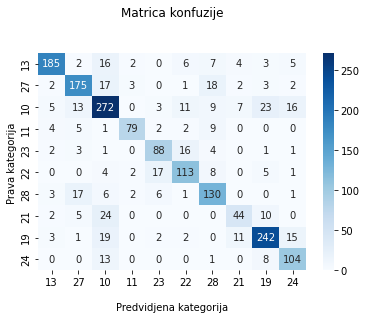

In [382]:

cf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

ax.set_title('Matrica konfuzije\n\n');
ax.set_xlabel('\nPredvidjena kategorija')
ax.set_ylabel('Prava kategorija ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(my_tags)
ax.yaxis.set_ticklabels(my_tags)

## Display the visualization of the Confusion Matrix.
plt.show()

### LSTM

In [36]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional


In [364]:

# vocab_size = 7500 # make the top list of words (common words)
# embedding_dim = 128
# max_length = 685
# trunc_type = 'post'
# padding_type = 'post'
# oov_tok = '<OOV>' # OOV = Out of Vocabulary
# training_portion = .8

In [505]:
df = pd.DataFrame({"Text":s_rows,"Label":classes})

In [506]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 10000
MAX_SEQUENCE_LENGTH = 685
# This is fixed.
EMBEDDING_DIM = 128
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 46426 unique tokens.


In [509]:
word_index

{'number': 1,
 'wa': 2,
 'use': 3,
 'thi': 4,
 'studi': 5,
 'data': 6,
 'result': 7,
 'effect': 8,
 'model': 9,
 'cell': 10,
 'differ': 11,
 'increas': 12,
 'associ': 13,
 'vaccin': 14,
 'activ': 15,
 'ha': 16,
 'develop': 17,
 'show': 18,
 'method': 19,
 'system': 20,
 'high': 21,
 'base': 22,
 'also': 23,
 'level': 24,
 'compar': 25,
 'measur': 26,
 'protein': 27,
 'time': 28,
 'present': 29,
 'analysi': 30,
 'provid': 31,
 'chang': 32,
 'respons': 33,
 'water': 34,
 'two': 35,
 'control': 36,
 'includ': 37,
 'process': 38,
 'potenti': 39,
 'assess': 40,
 'dure': 41,
 'sampl': 42,
 'may': 43,
 'year': 44,
 'function': 45,
 'test': 46,
 'identifi': 47,
 'age': 48,
 'p': 49,
 'howev': 50,
 'investig': 51,
 'observ': 52,
 'group': 53,
 'product': 54,
 'diseas': 55,
 'concentr': 56,
 'structur': 57,
 'patient': 58,
 'perform': 59,
 'gener': 60,
 'relat': 61,
 'express': 62,
 'suggest': 63,
 'risk': 64,
 'specif': 65,
 'reduc': 66,
 'condit': 67,
 'c': 68,
 'import': 69,
 'speci': 70,
 'h

In [511]:
X = tokenizer.texts_to_sequences(df['Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (12341, 685)


In [512]:
X

array([[   0,    0,    0, ..., 1407,    1,  572],
       [   0,    0,    0, ..., 1992, 1013, 1590],
       [   0,    0,    0, ...,   80, 2292,  258],
       ...,
       [   0,    0,    0, ...,  234,    1,    1],
       [   0,    0,    0, ...,  369,  174, 2827],
       [   0,    0,    0, ...,  187, 1071,   87]])

In [368]:
Y = pd.get_dummies(df['Label']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (12341, 10)


In [369]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42,stratify=Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(11106, 685) (11106, 10)
(1235, 685) (1235, 10)


In [373]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS,embedding_dim))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(embedding_dim)))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 128)         1280000   
                                                                 
 dropout_1 (Dropout)         (None, None, 128)         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,545,738
Trainable params: 1,545,738
Non-trainable params: 0
_________________________________________________________________


In [374]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [375]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=128,validation_split=0.15,verbose=1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
74/74 [==============================] - 2997s 41s/step - loss: 1.9931 - accuracy: 0.2990 - val_loss: 1.6008 - val_accuracy: 0.4412
Epoch 2/10
74/74 [==============================] - 3754s 51s/step - loss: 1.3582 - accuracy: 0.5138 - val_loss: 1.3059 - val_accuracy: 0.5438
Epoch 3/10
74/74 [==============================] - 4670s 63s/step - loss: 1.0302 - accuracy: 0.6195 - val_loss: 1.1726 - val_accuracy: 0.5654
Epoch 4/10
74/74 [==============================] - 2862s 38s/step - loss: 0.7885 - accuracy: 0.7075 - val_loss: 1.1644 - val_accuracy: 0.5858
Epoch 5/10
74/74 [==============================] - 2816s 38s/step - loss: 0.6032 - accuracy: 0.7858 - val_loss: 1.1915 - val_accuracy: 0.6236
Epoch 6/10
74/74 [==============================] - 2848s 38s/step - loss: 0.4765 - accuracy: 0.8332 - val_loss: 1.1860 - val_accuracy: 0.6116
Epoch 7/10
74/74 [==============================] - 2862s 39s/step - loss: 0.3679 - accuracy: 0.8769 - val_loss: 1.2600 - val_accuracy: 0.6230

In [376]:
#ovo je za model od 10(7) epoha
scores = model.evaluate(X_test, Y_test, verbose=2)


39/39 - 27s - loss: 1.2361 - accuracy: 0.6405 - 27s/epoch - 684ms/step


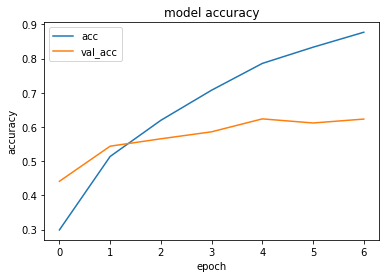

In [377]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

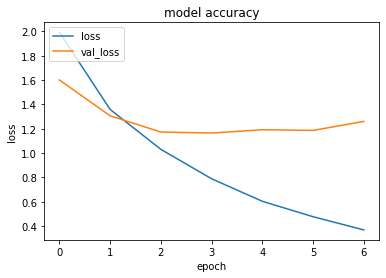

In [378]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

### CNN

In [33]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Embedding
from keras.preprocessing import sequence

In [236]:

# vocab_size = 10000 # make the top list of words (common words)
# embedding_dim = 128
# max_length = 685
# trunc_type = 'post'
# padding_type = 'post'
# oov_tok = '<OOV>' # OOV = Out of Vocabulary
# training_portion = .8

In [34]:
df = pd.DataFrame({"Text":s_rows,"Label":classes})

In [37]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 10000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 685
# This is fixed.
EMBEDDING_DIM = 128
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 46426 unique tokens.


In [38]:
X = tokenizer.texts_to_sequences(df['Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (12341, 685)


In [39]:
Y = pd.get_dummies(df['Label']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (12341, 10)


In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42,stratify=Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(11106, 685) (11106, 10)
(1235, 685) (1235, 10)


In [41]:
from keras.callbacks import ModelCheckpoint, EarlyStopping



max_words = 685
#X_train = pad_sequences(X_train, maxlen=max_words)
#X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# Building the CNN Model
model = Sequential()      # initilaizing the Sequential nature for CNN model
model.add(Embedding(MAX_NB_WORDS, 128, input_length=max_words))

model.add(Conv1D(32, 3, padding='same', activation='relu'))

model.add(MaxPooling1D())

model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 685, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 685, 32)           12320     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 342, 32)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10944)             0         
                                                                 
 dense (Dense)               (None, 250)               2736250   
                                                                 
 dense_1 (Dense)             (None, 10)                2510      
                                                        

In [42]:
epochs = 8
batch_size = 128

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,verbose=2,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/8
79/79 - 32s - loss: 1.7903 - accuracy: 0.3574 - val_loss: 1.2766 - val_accuracy: 0.5176 - 32s/epoch - 407ms/step
Epoch 2/8
79/79 - 38s - loss: 0.9292 - accuracy: 0.6655 - val_loss: 0.9124 - val_accuracy: 0.6976 - 38s/epoch - 480ms/step
Epoch 3/8
79/79 - 37s - loss: 0.4384 - accuracy: 0.8519 - val_loss: 0.9259 - val_accuracy: 0.7138 - 37s/epoch - 466ms/step
Epoch 4/8
79/79 - 38s - loss: 0.1752 - accuracy: 0.9488 - val_loss: 1.0401 - val_accuracy: 0.7147 - 38s/epoch - 481ms/step
Epoch 5/8
79/79 - 39s - loss: 0.0532 - accuracy: 0.9919 - val_loss: 1.1917 - val_accuracy: 0.7282 - 39s/epoch - 496ms/step


In [43]:
scores = model.evaluate(X_test, Y_test, verbose=2)


39/39 - 1s - loss: 1.3241 - accuracy: 0.7069 - 885ms/epoch - 23ms/step


In [44]:
Y_pred = model.predict(X_test)


39/39 [==============================] - 1s 24ms/step


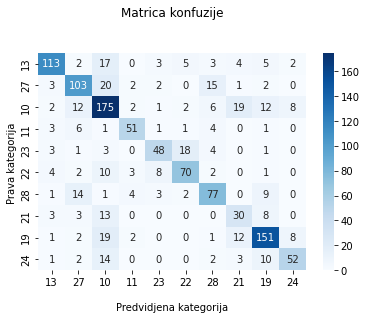

In [64]:
cf_matrix = sklearn.metrics.confusion_matrix(Y_test.argmax(axis=1),Y_pred.argmax(axis=1))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

ax.set_title('Matrica konfuzije\n\n');
ax.set_xlabel('\nPredvidjena kategorija')
ax.set_ylabel('Prava kategorija ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(my_tags)
ax.yaxis.set_ticklabels(my_tags)

## Display the visualization of the Confusion Matrix.
plt.show()

In [63]:
print(classification_report(Y_test.argmax(axis=1),Y_pred.argmax(axis=1),target_names=my_tags,digits=4))

              precision    recall  f1-score   support

          13     0.8433    0.7338    0.7847       154
          27     0.7007    0.6959    0.6983       148
          10     0.6410    0.7322    0.6836       239
          11     0.7969    0.7500    0.7727        68
          23     0.7273    0.6154    0.6667        78
          22     0.7143    0.7000    0.7071       100
          28     0.6754    0.6937    0.6844       111
          21     0.4348    0.5263    0.4762        57
          19     0.7550    0.7704    0.7626       196
          24     0.7429    0.6190    0.6753        84

    accuracy                         0.7045      1235
   macro avg     0.7032    0.6837    0.6912      1235
weighted avg     0.7119    0.7045    0.7062      1235



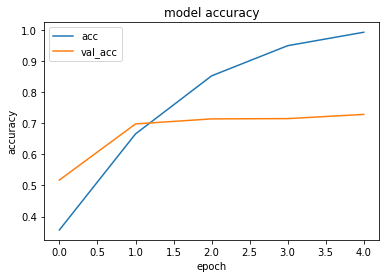

In [65]:
#plotovati ponovo na ovom modelu
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

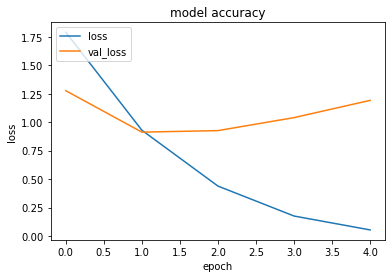

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

### Doc2Vec

In [224]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument


In [225]:
df = pd.DataFrame({"Text":s_rows,"Label":classes})

In [226]:
df

,Text,Label
0,object overal research object wa theoret empir...,22
1,object accid map algorithm snap traffic accid ...,22
2,driver behavior questionnair dbq self report m...,22
3,oper motor vehicl influenc alcohol oui intern ...,22
4,driver drowsi ha implic major causal factor ro...,22
...,...,...
12336,today climat chang effect intens ultraviolet u...,10
12337,articl present data exploratori analysi factor...,10
12338,data present thi articl relat research articl ...,10
12339,aim studi determin bone miner densiti bmd pati...,10


In [227]:
train, test = train_test_split(df, test_size=0.15, random_state=42)


In [228]:
train_tag = train.apply(lambda x: TaggedDocument(words=word_tokenize(x['Text']), tags=[x.Label]), axis=1)

test_tag = test.apply(lambda x: TaggedDocument(words=word_tokenize(x['Text']), tags=[x.Label]), axis=1)

In [229]:
train_tag[1234]

TaggedDocument(words=['ex', 'vivo', 'ocular', 'perfus', 'model', 'describ', 'past', 'appli', 'differ', 'mammalian', 'speci', 'platform', 'test', 'drug', 'deliveri', 'system', 'surgic', 'techniqu', 'howev', 'reproduct', 'method', 'challeng', 'becaus', 'extens', 'precis', 'descript', 'protocol', 'use', 'lack', 'thi', 'technic', 'paper', 'provid', 'detail', 'descript', 'step', 'follow', 'enucl', 'porcin', 'eye', 'cannul', 'ophthalm', 'arteri', 'perfus', 'thi', 'model', 'contribut', 'reduct', 'use', 'live', 'anim', 'ophthalmolog', 'research', 'wherea', 'oppos', 'vitro', 'model', 'preserv', 'tissu', 'complex', 'integr'], tags=[28])

In [230]:
doc_model = Doc2Vec(dm=0, vector_size=100, min_count=2, window=2, sample = 0)
               
doc_model.build_vocab(train_tag)

In [231]:
doc_model.corpus_total_words


1589481

In [232]:
%time doc_model.train(train_tag, total_examples=doc_model.corpus_count, epochs=30) 


CPU times: total: 2min 51s
Wall time: 1min 23s


In [233]:
doc_model.save('model1.doc2vec')


In [234]:
def vector_for_learning(model, input_docs):
    sents = input_docs
    targets, feature_vectors = zip(*[(doc.tags[0], model.infer_vector(doc.words)) for doc in sents])
    return targets, feature_vectors

In [235]:
y_train, X_train = vector_for_learning(doc_model, train_tag)
y_test, X_test = vector_for_learning(doc_model, test_tag)

In [89]:
#logisticka regresija na doc2vec
log_reg = LogisticRegression(C=1,n_jobs=5,solver='newton-cg', penalty='none', multi_class='multinomial', max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [96]:

print('Testing accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

Testing accuracy 0.7170626349892009
              precision    recall  f1-score   support

          13       0.75      0.77      0.76       222
          27       0.75      0.76      0.75       255
          10       0.68      0.72      0.70       364
          11       0.86      0.89      0.88       111
          23       0.69      0.66      0.67       108
          22       0.66      0.74      0.70       125
          28       0.72      0.64      0.68       172
          21       0.59      0.45      0.51        96
          19       0.75      0.78      0.77       282
          24       0.62      0.56      0.59       117

    accuracy                           0.72      1852
   macro avg       0.71      0.70      0.70      1852
weighted avg       0.72      0.72      0.71      1852



In [236]:
#svm na doc2vec
svm = SGDClassifier(loss='hinge', penalty='l2', random_state=42, max_iter=200, tol=0.001)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)


In [237]:
print('Testing accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags,digits=4))

Testing accuracy 0.7359611231101512
              precision    recall  f1-score   support

          13     0.8235    0.7568    0.7887       222
          27     0.7500    0.7647    0.7573       255
          10     0.6573    0.7692    0.7089       364
          11     0.9018    0.9099    0.9058       111
          23     0.7600    0.7037    0.7308       108
          22     0.7561    0.7440    0.7500       125
          28     0.7256    0.6919    0.7083       172
          21     0.7317    0.3125    0.4380        96
          19     0.7152    0.8369    0.7712       282
          24     0.7065    0.5556    0.6220       117

    accuracy                         0.7360      1852
   macro avg     0.7528    0.7045    0.7181      1852
weighted avg     0.7394    0.7360    0.7309      1852



In [85]:
#y train i test encoding da bi uspesno prosli kroz xgboost algoritam
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

encoder = LabelEncoder()
y_train_codes = encoder.fit_transform(y_train)
print(y_train_codes)

encoder = LabelEncoder()
y_test_codes = encoder.fit_transform(y_test)
print(y_test_codes)

[1 8 1 ... 2 2 1]
[7 2 9 ... 8 2 1]


In [86]:
xgb = XGBClassifier(max_depth=15,
                        subsample=1,
                        objective='reg:logistic',
                        n_estimators=300,
                        learning_rate = 0.3)
xgb.fit(X_train, y_train_codes)
y_pred = xgb.predict(X_test)

In [88]:
print('Testing accuracy %s' % accuracy_score(y_pred, y_test_codes))
print(classification_report(y_test_codes, y_pred,target_names=my_tags,digits=4))

Testing accuracy 0.734341252699784
              precision    recall  f1-score   support

          13     0.8359    0.7342    0.7818       222
          27     0.7640    0.7490    0.7564       255
          10     0.6586    0.7473    0.7001       364
          11     0.8929    0.9009    0.8969       111
          23     0.7453    0.7315    0.7383       108
          22     0.6765    0.7360    0.7050       125
          28     0.7381    0.7209    0.7294       172
          21     0.6774    0.4375    0.5316        96
          19     0.7320    0.7943    0.7619       282
          24     0.7019    0.6239    0.6606       117

    accuracy                         0.7343      1852
   macro avg     0.7423    0.7176    0.7262      1852
weighted avg     0.7369    0.7343    0.7329      1852



In [81]:
mlp = MLPClassifier(solver='adam',activation='logistic',learning_rate='adaptive',
                                     hidden_layer_sizes=(100,),learning_rate_init=0.001,
                                     shuffle=True,early_stopping=True,validation_fraction=0.1,max_iter=1000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

In [82]:
print('Testing accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags,digits=4))

Testing accuracy 0.7613390928725702
              precision    recall  f1-score   support

          13     0.8543    0.7658    0.8076       222
          27     0.7769    0.7922    0.7845       255
          10     0.6975    0.7665    0.7304       364
          11     0.8850    0.9009    0.8929       111
          23     0.7391    0.7870    0.7623       108
          22     0.7364    0.7600    0.7480       125
          28     0.7427    0.7384    0.7405       172
          21     0.7231    0.4896    0.5839        96
          19     0.7864    0.8227    0.8042       282
          24     0.6952    0.6239    0.6577       117

    accuracy                         0.7613      1852
   macro avg     0.7637    0.7447    0.7512      1852
weighted avg     0.7624    0.7613    0.7599      1852



### Detaljniji opis najboljeg modela - SVM

In [375]:
#SVM na test skupu testiran s najboljim parametrima
from sklearn.linear_model import SGDClassifier


svm = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier(loss='hinge',alpha=0.0001, penalty='l2', random_state=42, max_iter=50, tol=0.001)),
              ])
svm.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = svm.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags_dict.values()))

accuracy 0.7926565874730022
                                              precision    recall  f1-score   support

Biochemistry, Genetics and Molecular Biology       0.90      0.82      0.85       230
                                    Medicine       0.79      0.78      0.79       223
                                     General       0.75      0.77      0.76       359
        Agricultural and Biological Sciences       0.88      0.85      0.87       102
                       Environmental Science       0.78      0.84      0.80       116
                                 Engineering       0.76      0.78      0.77       150
                                Neuroscience       0.76      0.80      0.78       166
                                      Energy       0.72      0.55      0.63        85
                Earth and Planetary Sciences       0.82      0.85      0.83       295
                 Immunology and Microbiology       0.76      0.79      0.77       126

                        

In [242]:
earths=[]
for i in range(len(y_pred)):
    if y_pred[i]==19:
        earths.append(i)
earths   
#svi indeksi u y_test gde je predvidjena klasa earth

[8,
 40,
 76,
 84,
 110,
 113,
 135,
 141,
 181,
 190,
 222,
 257,
 272,
 277,
 300,
 336,
 343,
 346,
 367,
 368,
 394,
 401,
 406,
 410,
 465,
 481,
 484,
 534,
 611,
 613,
 633,
 657,
 660,
 669,
 690,
 695,
 699,
 717,
 718,
 728,
 731,
 735,
 763,
 770,
 789,
 809,
 818,
 826,
 844,
 887,
 900,
 946,
 947,
 1008,
 1022,
 1031,
 1049,
 1076,
 1086,
 1103,
 1109,
 1113,
 1118,
 1121,
 1130,
 1186,
 1245,
 1259,
 1283,
 1311,
 1317,
 1338,
 1341,
 1345,
 1350,
 1366,
 1390,
 1414,
 1462,
 1463,
 1508,
 1531,
 1547,
 1574,
 1578,
 1579,
 1598,
 1599,
 1618,
 1645,
 1736,
 1741,
 1752,
 1764,
 1771,
 1779,
 1790,
 1801,
 1845]

In [243]:
general_earth_misses = []
for i in range(len(earths)):
    if y_test[earths[i]:earths[i]+1].values[0]==10:
        general_earth_misses.append(i)
#indeksi gde je earth zamenjen za general

In [244]:
general_earth_misses 

[15, 39, 60]

In [245]:
earths[15]

336

In [185]:
X_test[336:337].values[0]

'atlant multided oscil amo promin mode sea surfac temperatur variabl atlant incur signific global influenc coupl model fail reproduc observ number number year amo overwhelm number number year amo show number number year amo number number year amo repres two differ amo regim key differ number number number year amo involv transport warm salin atlant water greenland iceland norwegian gin sea prior reach maximum posit phase transport weak number number year amo number zonal atmospher variabl associ number number year amo favor transport warm salin water gin sea number disappear pacif variabl weaken zonal atmospher variabl transport warm salin water gin sea lead weaken number number year amo contrast number number year amo doe show depend variabl pacif gin sea may atlant intrins mode result suggest differenti amo regim better understand cross basin connect essenti reconcil current debat natur amo henc reliabl predict still lack coupl model'

In [201]:
#trazimo tekst iz prethodne celije u verziji teksta pre predobrade
for i in df_final_new[df_final_new['Label']==10]['Text']:
    if 'model' in i and 'atmospher' in i:
        print(i)
        break


The Atlantic Multidedal Oscillation (AMO) is a prominent mode of sea surface temperature variability in the Atlantic and incurs significant global influence. Most coupled models failed to reproduce the observed 50–80-year AMO, but were overwhelmed by a 10–30-year AMO. Here we show that the 50–80-year AMO and 10–30-year AMO represent two different AMO regimes. The key differences are: (1) the 50–80-year AMO involves transport of warm and saline Atlantic water into the Greenland-Iceland-Norwegian (GIN) Seas prior to reaching its maximum positive phase, while such a transport is weak for the 10–30-year AMO; (2) the zonality of atmospheric variability associated with the 50–80 year AMO favors the transport of warm and saline water into the GIN Seas; (3) the disappearance of Pacific variability weakens the zonality of atmospheric variability and the transport of warm and saline water into the GIN Seas, leading to the weakening of the 50–80-year AMO. In contrast, the 10–30-year AMO does not 

In [186]:
#isti postupak se ponavlja za klasu agrikultura
agricultures=[]
for i in range(len(y_pred)):
    if y_pred[i]==11:
        agricultures.append(i)
agricultures   
        

[0,
 4,
 11,
 15,
 18,
 22,
 23,
 25,
 26,
 36,
 51,
 63,
 71,
 72,
 112,
 117,
 120,
 122,
 131,
 142,
 144,
 146,
 149,
 157,
 162,
 163,
 167,
 174,
 176,
 178,
 184,
 187,
 194,
 204,
 211,
 216,
 223,
 224,
 235,
 245,
 256,
 285,
 301,
 303,
 316,
 317,
 325,
 331,
 340,
 347,
 355,
 369,
 376,
 378,
 381,
 384,
 389,
 395,
 398,
 402,
 403,
 407,
 408,
 425,
 433,
 455,
 466,
 477,
 478,
 486,
 487,
 493,
 517,
 529,
 533,
 544,
 551,
 559,
 564,
 566,
 568,
 570,
 574,
 583,
 604,
 620,
 626,
 631,
 636,
 637,
 645,
 647,
 663,
 666,
 668,
 691,
 693,
 701,
 707,
 713,
 729,
 755,
 757,
 762,
 776,
 792,
 836,
 848,
 851,
 852,
 854,
 858,
 860,
 861,
 864,
 876,
 877,
 884,
 886,
 894,
 915,
 932,
 937,
 941,
 943,
 967,
 974,
 983,
 987,
 991,
 992,
 995,
 1011,
 1013,
 1015,
 1019,
 1030,
 1045,
 1048,
 1067,
 1068,
 1073,
 1078,
 1105,
 1106,
 1123,
 1124,
 1131,
 1138,
 1139,
 1141,
 1145,
 1147,
 1155,
 1163,
 1166,
 1172,
 1194,
 1220,
 1231,
 1242,
 1251,
 1257,
 1276,


In [190]:
X_test[0:1].values[0]

'bioassay guid fraction dichloromethan extract olax dissitiflora bark ha led isol santalb acid mixtur two close relat compound exocarp acid octadec number number diynoic acid isol compound evalu larvicid activ laboratori rear larva arabiensi mosquito potent malaria vector south africa mixtur exocarp acid octadec number number diynoic acid exhibit highest larvicid activ ecnumb valu number numberμg ml compar ximenin acid ecnumb valu number numberμg ml'

In [203]:
for i in df_final_new[df_final_new['Label']==11]['Text']:
    if 'dichloromethan' in i and 'exocarp' in i:
        print(i)
        break

Bioassay-guided fractionation of the dichloromethane extract of Olax dissitiflora bark has led to the isolation of santalbic acid and a mixture of two closely related compounds (exocarpic acid and octadec-9,11-diynoic acid). The isolated compounds were then evaluated for their larvicidal activity against laboratory-reared larvae of An. arabiensis mosquitoes, a potent malaria vector in South Africa. The mixture of exocarpic acid and octadec-9,11-diynoic acid exhibited the highest larvicidal activity with an EC50 value of 17.31μg/ml compared to ximeninic acid which had an EC50 value of 62.17μg/ml.


In [387]:
#matrica konfuzije

cf_matrix = confusion_matrix(y_test, y_pred)


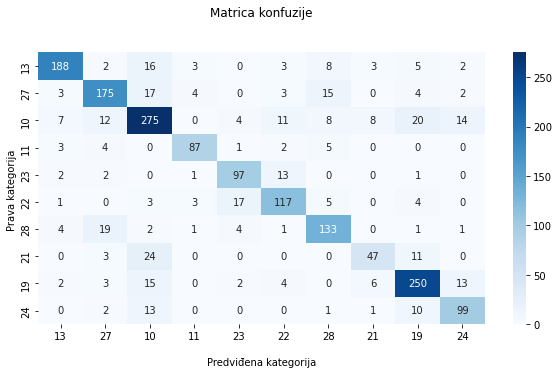

In [376]:
import seaborn as sns
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

ax.set_title('Matrica konfuzije\n\n');
ax.set_xlabel('\nPredviđena kategorija')
ax.set_ylabel('Prava kategorija ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(my_tags)
ax.yaxis.set_ticklabels(my_tags)

## Display the visualization of the Confusion Matrix.
plt.show()


In [354]:
my_tags_dict

{'13': 'Biochemistry, Genetics and Molecular Biology',
 '27': 'Medicine',
 '10': 'General',
 '11': 'Agricultural and Biological Sciences',
 '23': 'Environmental Science',
 '22': 'Engineering',
 '28': 'Neuroscience',
 '21': 'Energy',
 '19': 'Earth and Planetary Sciences',
 '24': 'Immunology and Microbiology'}